In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("Mall_Customers.csv")

In [15]:
# x= ds.iloc[:,[3,4]] # Will present as dataset
x= ds.iloc[:,[3,4]].values #will appaear as list [:,3:5]

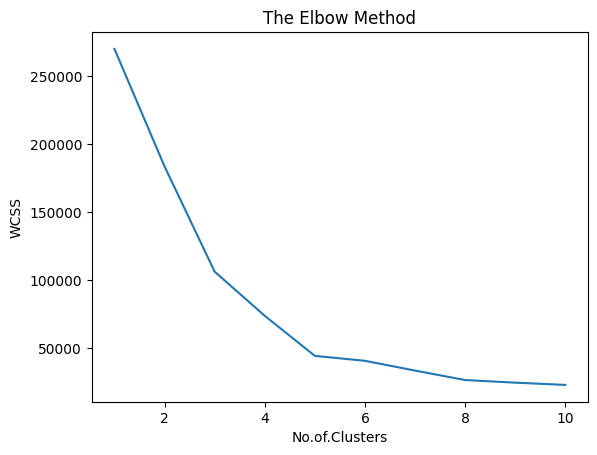

In [4]:
#Identify the possible clusters 
from sklearn.cluster import KMeans
list =[] # empty list
for i in range(1,11) : # creating 10 clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =42)
    kmeans.fit(x) # model is getting created, in total 10 model (10 clusters) will get created as its in the for loop
    list.append(kmeans.inertia_) # inertia_ value gets append in the list[]
#plotting to find the detail targeting clusters
plt.plot(range(1,11),list)
plt.title("The Elbow Method")
plt.xlabel("No.of.Clusters")
plt.ylabel("WCSS")
plt.show()

In [5]:
# above we identify the number of cluster and passing it to built the model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state =42)

Cluster = kmeans.fit_predict(x) # model created by fit and predict which category it belongs to
# here we dont have the training and test set

In [16]:
#adding the identified cluster in the data set
#supervised = pd.DataFrame(ds)
supervised = ds
supervised['Cluster_Group'] = Cluster
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [7]:
#supervised.to_csv("Cluster.csv",index=False)

In [8]:
centroids = kmeans.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\hitov\anaconda3\envs\ml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


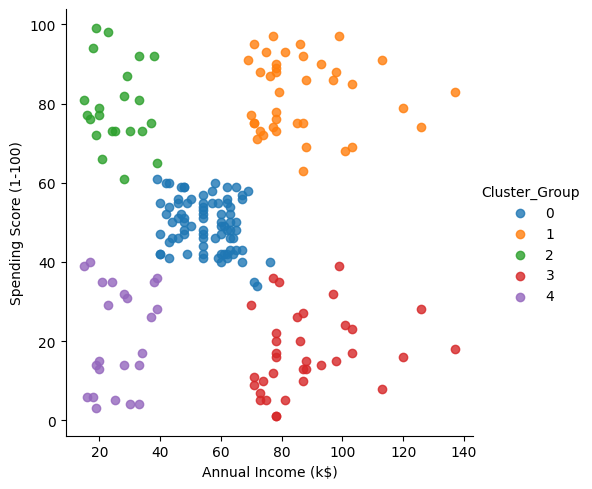

In [10]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5], fit_reg=False,
        legend=True, legend_out=True)